<h1 align=center><font size=5>Human-Centered Data Science  Final Project - 2021</font></h1>
<h1 align=center><font size=5>THE MIND OF AN HR BOT</font></h1>
<h1 align=center><font size=4>Sub-experiment 2: Wordclouds</font></h1>
<h2 align=center><font size=3>Gopika Krishnan (gk1656)</font></h2>

In [37]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 6.8 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158007 sha256=65071a56a5b2f58a3dbd1edaa840936e30578dce85162097336fc3354190733b
  Stored in directory: /Users/gopikakrishnan/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [124]:
!pip install cv
!pip install opencv-python

In [125]:
df1=pd.read_csv("dice_com-job_us_sample.csv")
df1

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7
...,...,...,...,...,...,...,...,...,...,...,...,...
21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,Dice Id : 10112803,"Oakland, CA",Web Designer,3 weeks ago,Telecommuting not available|Travel not required,NaN,"UI/UX mobile apps, interaction design, digital...",86e27ce6b7e631e55d69d142c7d43df2
21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,Dice Id : 10289500,"San Francisco, CA",Senior Front End Web Developer - Full Time at ...,3 weeks ago,Telecommuting not available|Travel not required,NaN,"JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac...",4287c7ee3317ccf1edd76e238cf8e584
21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,Dice Id : 10115761,"San Francisco, CA",QA Analyst,2 weeks ago,Telecommuting not available|Travel not required,NaN,"SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio...",d7512f0181d69f83f96db38cd77a4d08
21998,https://www.dice.com/jobs/detail/Tech-Lead%252...,IAC Publishing,Full Time,Company Description What We Can Offer YouAs th...,Dice Id : 10112803,"Oakland, CA",Tech Lead-Full Stack,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Python, Ruby, Go, Clojure, Java, NoSQL-Databas...",ec375268b494b3bcbed1635d64226112


In [126]:
#filtering the dataset to get only jobs related to software engineering
df=df1.loc[df1['jobtitle'].str.lower().str.contains('software engineer')|(df1['jobtitle'].str.lower().str.contains('software')&df1['jobtitle'].str.lower().str.contains('engineer'))]
df

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
12,https://www.dice.com/jobs/detail/Software-Engi...,"VanderHouwen & Associates, Inc.","Full Time, Full time",VanderHouwen has more jobs you may like! Find...,Dice Id : vhassoc,"Portland, OR",Software Engineer Manager,7 hours ago,Telecommuting not available|Travel not required,NaN,"Java, OSS",d0c81a2e3e5d666f3d730f1048c49132
29,https://www.dice.com/jobs/detail/Sr.-Software-...,"VanderHouwen & Associates, Inc.","Full Time, Full time",PLEASE JOIN OUR TALENT NETWORK: http://bit.ly/...,Dice Id : vhassoc,"Seattle, WA",Sr. Software Storage Engineer,7 hours ago,Telecommuting not available|Travel not required,NaN,"C and C++, Linux, UNIX",b1db84e23f424b1481b29212749abadc
30,https://www.dice.com/jobs/detail/C%252B%252B-S...,Alpha Recruitment,"Full Time, Fulltime Permanent",Our client is seeking a Software Developer to ...,Dice Id : 10369051,"Philadelphia, PA",C++ Software Engineer,7 hours ago,Telecommuting not available|Travel not required,NaN,Bachelor's degree with 5 years of experience d...,51a0050d469e787dba2102383797536d
42,https://www.dice.com/jobs/detail/Software-Deve...,Amazon,"Full Time, Fulltime",Do you want to help build a highly personalize...,Dice Id : amazsell,"Austin, TX","Software Development Engineer, Big Data",7 hours ago,Telecommuting not available|Travel not required,NaN,DESCRIPTION Do you want to help build a highly...,8cb4914f42c5b805d19be0952b3c88e9
60,https://www.dice.com/jobs/detail/Software-Engi...,Xoriant Corporation,"Contract Independent, Contract W2, C2H Indepen...",Position: Software Engineer (Algorithm)Durat...,Dice Id : xorca001,"Bridgewater, NJ",Software Engineer (Algorithm),7 hours ago,Telecommuting not available|Travel not required,NaN,"Algorithm Engineer , Computer vision, Open CV ...",f5ce47ef55f66c279c306ceeb5e3f01e
...,...,...,...,...,...,...,...,...,...,...,...,...
21924,https://www.dice.com/jobs/detail/Software-Engi...,Accelon Inc,Contract Corp-To-Corp,RESPONSIBILITIES: • Strong coding skills in JS...,Dice Id : 90887031,"San Rafael, CA",Software Engineer II,3 weeks ago,Telecommuting not available|Travel not required,NaN,Software Engineer,74ed799c99409df3873ff15faf6f27ea
21969,https://www.dice.com/jobs/detail/Staff-Softwar...,Guidewire Software,Full Time,Guidewire is transforming the P&C insurance in...,Dice Id : 10118364,"Foster City, CA",Staff Software Engineer (Cloud Platform) - Fos...,2 weeks ago,Telecommuting not available|Travel not required,NaN,"core AWS, Azure, Google Cloud Platform,distrib...",372a4677f5824fa2a07aecac542892cc
21972,https://www.dice.com/jobs/detail/Sr.-Software-...,BRIDGE NOBLE,Full Time,Sr. Software Engineer - Node.js - Leading Hosp...,Dice Id : 10504574,"San Francisco, CA",Sr. Software Engineer - Node.js - Leading Hosp...,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Node.js, Javascript",e501c02a4038dd49d420411fc2632ac8
21975,https://www.dice.com/jobs/detail/Go%2526%25234...,Proactive Technical Services,"Contract Corp-To-Corp, Contract W2, 12 Months",Go/Golang Software EngineerLocation: Palo Alto...,Dice Id : 10331486,"Palo Alto, CA",Go/Golang Software Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"Java, Go/Golang, and Python, Go/Golang, Go/Gol...",83d1393d14ae7edbefb719b5f37ecd6d


In [127]:
#for the job descriptions
job_comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.jobdescription:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    job_comment_words += " ".join(tokens)+" "

In [128]:
#for the skills
skill_comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.skills:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    skill_comment_words += " ".join(tokens)+" "

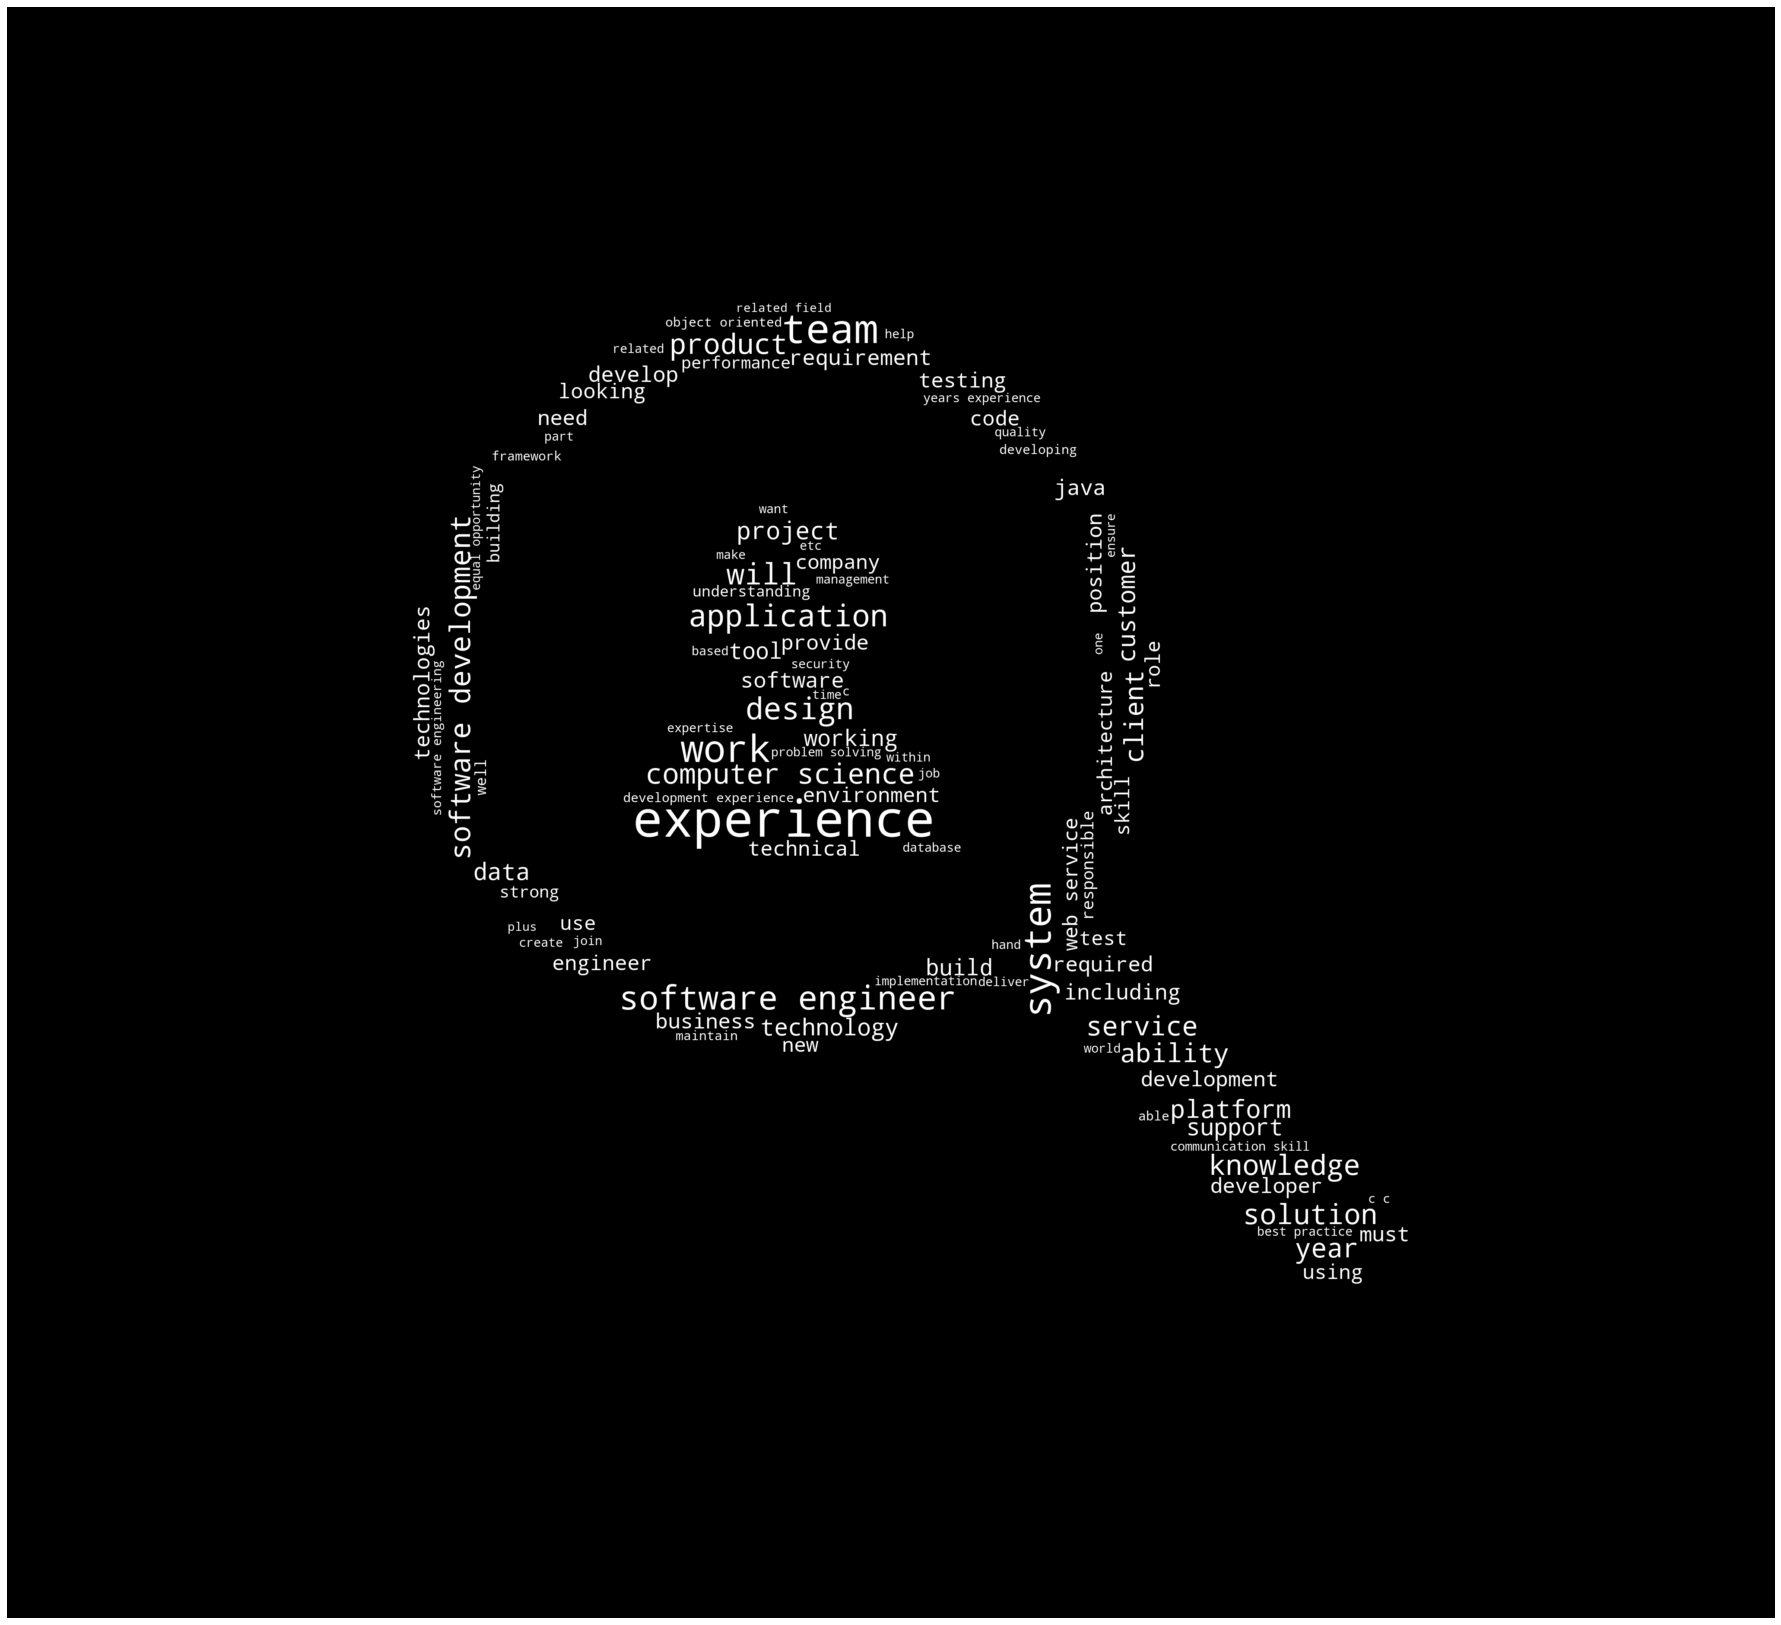

In [129]:
import cv2
from wordcloud import WordCloud 
import matplotlib.pyplot as plt#White text Black Background
image = cv2.imread("search.v1.png", 1) #image on which the wordcloud will be made

#job description wordcloud
wordcloud = WordCloud(background_color='black', mask=image, mode="RGB", color_func=lambda *args, **kwargs: "white", 
width=1000 , max_words=100, height=1000, random_state=3).generate(job_comment_words)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

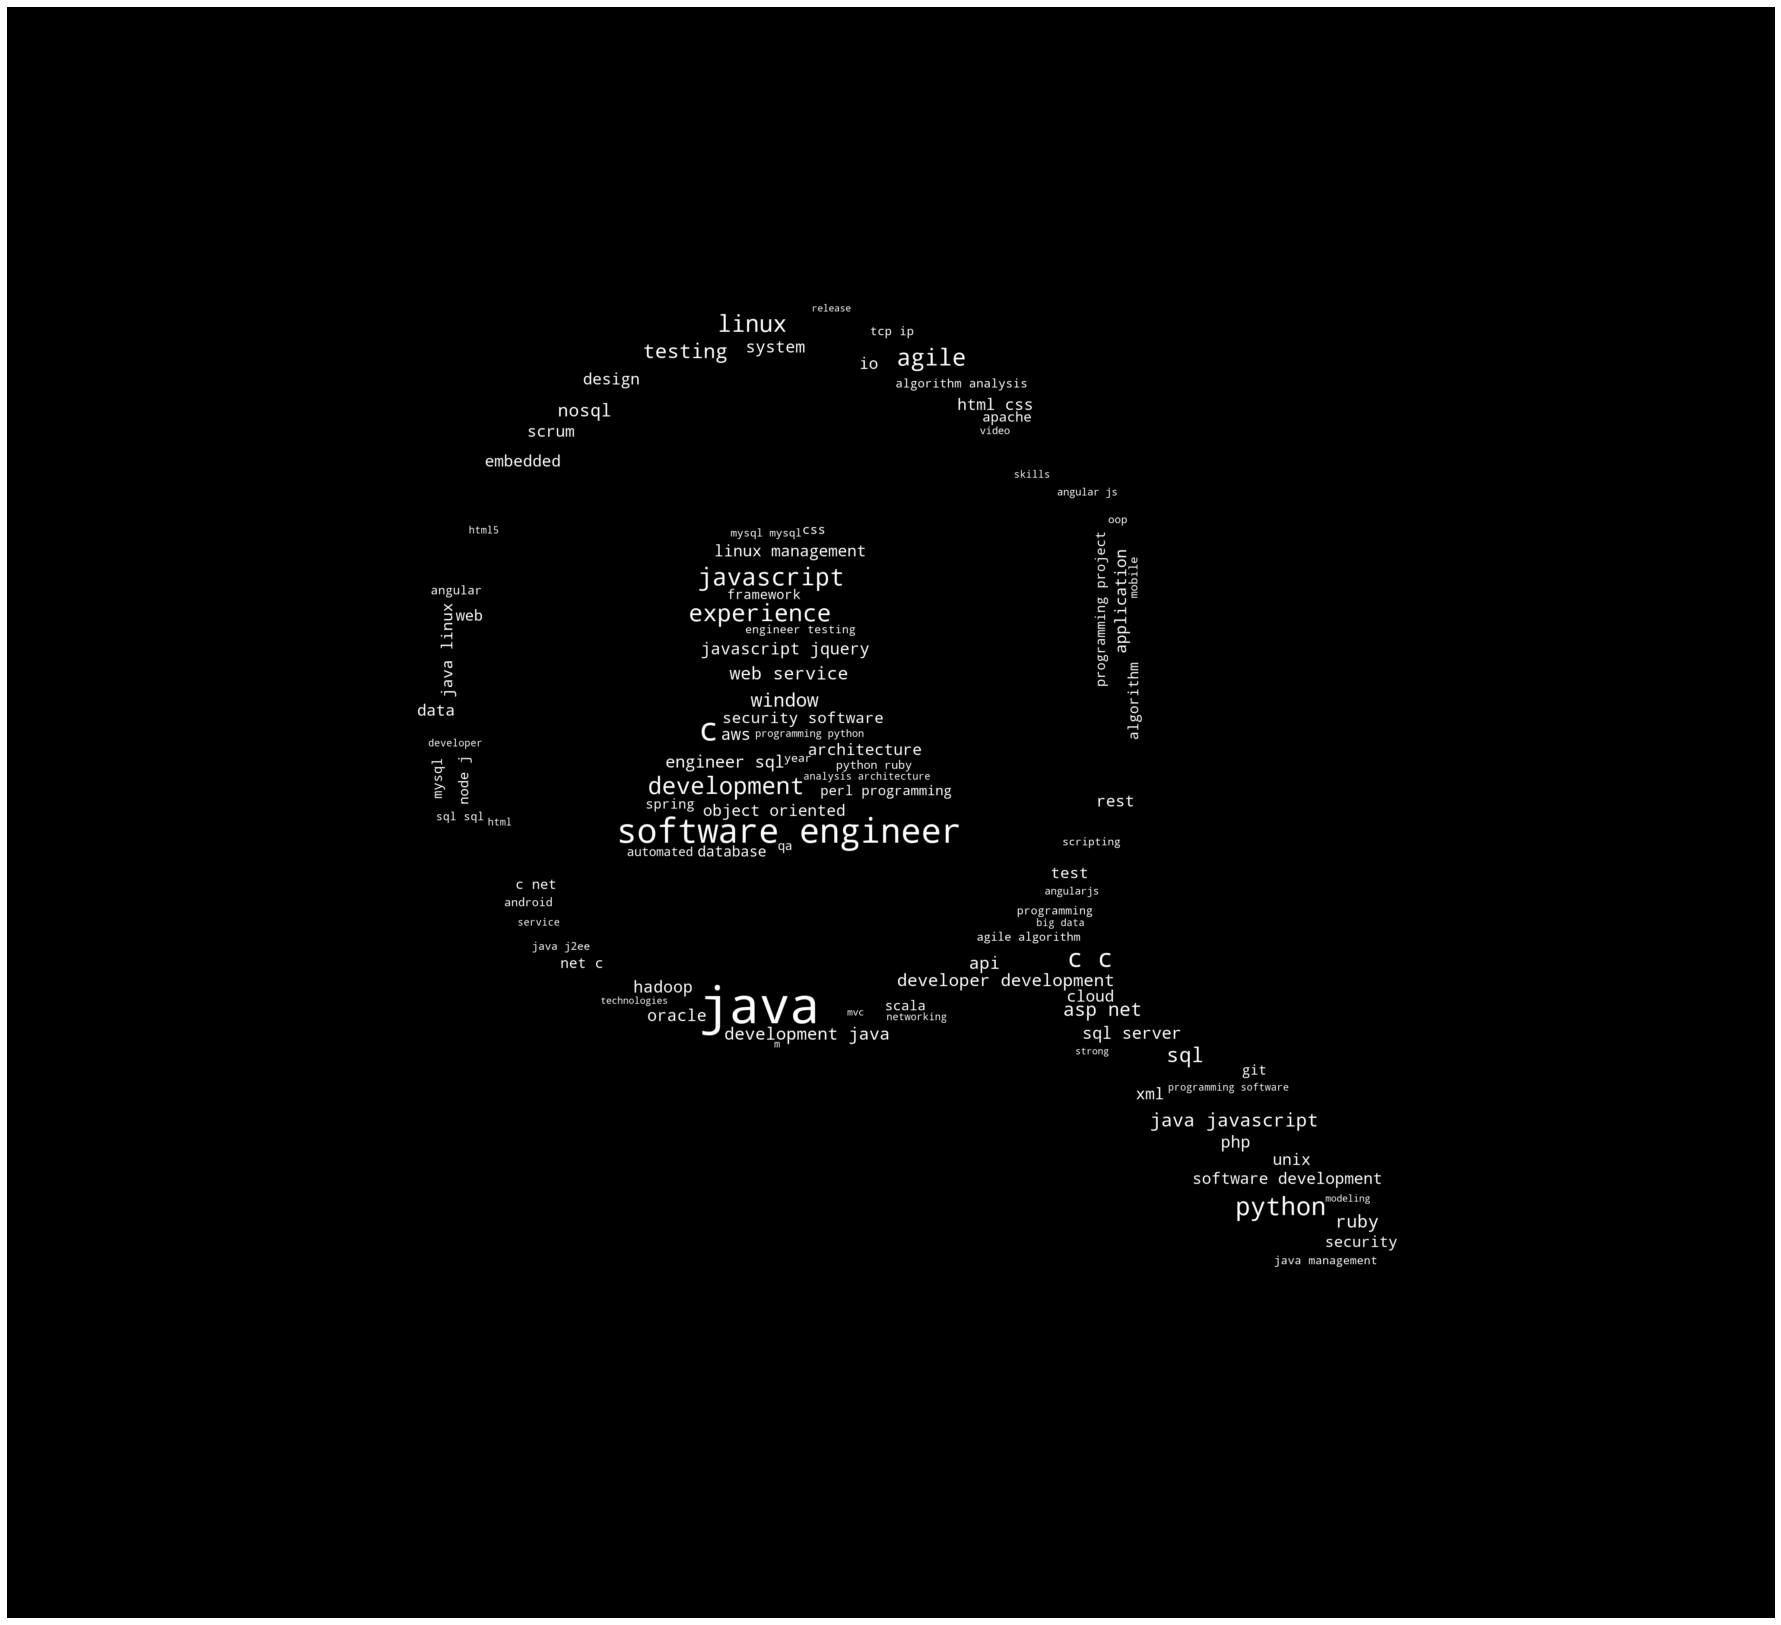

In [130]:
#skills wordcloud
wordcloud = WordCloud(background_color='black', mask=image, mode="RGB", color_func=lambda *args, **kwargs: "white", 
width=1000 , max_words=100, height=1000, random_state=3).generate(skill_comment_words)
fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [131]:
#finding a specific job description to test the resume
df['jobdescription'][12]

'VanderHouwen has more jobs you may like!\xa0 Find them here: http://bit.ly/1RIQfgE\xa0PLEASE JOIN OUR TALENT NETWORK: http://bit.ly/vhatalentnetwork\xa0\xa0Joining the Talent Network with VanderHouwen & Associates (VHA) will enhance your job search and application experience. Job listings are mobile-friendly and easy to review, share, or apply. Whether you choose to just leave us\xa0your information or apply, we look forward to connecting with you. SummaryOur client is seeking an engineering manager to lead a team of 3*6 engineers working on the server side of our industry-disrupting clearing platform.Ideal candidate will be:Experienced. Have extensive experience building back-end applications and services, and managing engineersPassionate. Driven to improve your managerial skill set every day. Keen to solve interesting problems with creative and simple solutions.Pragmatic. Would rather deliver a 40% solution in two weeks than an 80% solution in six.Introspective. You recognize your s

--- 
### **Th**
---